<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_2%5CExperiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Note: Roll Number = 191EE123 <br>
a = 1 + mod(123,4) = 4

In [2]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft



a = 4
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})

# **Problem** **1**. <br>
Part 1:

In [3]:
f1 = 5*a
f2 = 6*a
f3 = 10*a
t = np.linspace(0,1/a,5000)
y1 = a*np.cos(2*pi*f1*t)
y2 = (a/2)*np.cos(2*pi*f2*t)
y3 = (a/4)*np.cos(2*pi*f3*t)
plot_label = ['$4*cos(40*\pi*t)$', '$2*cos(48*\pi*t)$', '$1*cos(80*\pi*t)$']
plot_title = ['Cosine function with amplitude ' + r'$\alpha$' + ' and frequency 5'+r'$\alpha$'+ ' Hz', 'Cosine function with amplitude ' + r'$\alpha /2$' + ' and frequency 6'+r'$\alpha$'+ ' Hz', 'Cosine function with amplitude ' + r'$\alpha /4$' + ' and frequency 10'+r'$\alpha$'+ ' Hz']

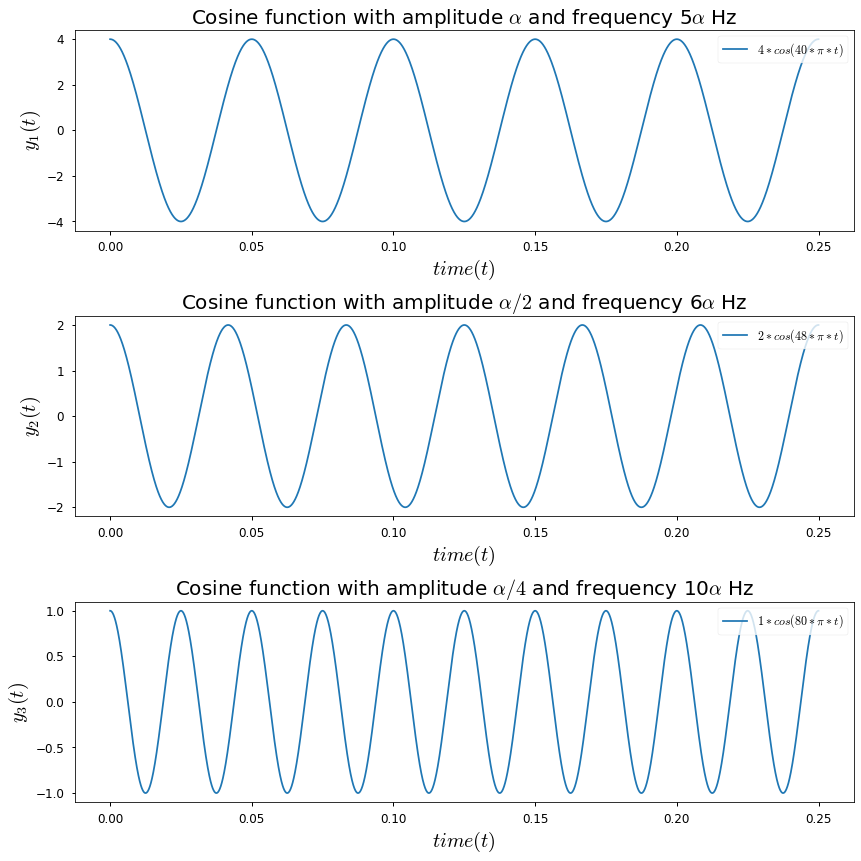

In [4]:
fig, axs = plt.subplots(3, figsize=(12,12))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y, label = plot_label[row])
    axs[row].legend(loc = 'upper right', fontsize = 12)
    axs[row].set_title(plot_title[row], fontsize = 20)
    axs[row].set_xlabel(xaxis_label, fontsize = 20)
    axs[row].set_ylabel(yaxis_label, fontsize = 20)
    axs[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(t, y1, xaxis_label=r'$time(t)$', yaxis_label=r'$y_1(t)$', row=0)
plot_signal(t, y2, xaxis_label=r'$time(t)$', yaxis_label=r'$y_2(t)$', row=1)
plot_signal(t, y3, xaxis_label=r'$time(t)$', yaxis_label=r'$y_3(t)$', row=2)

Part 2:

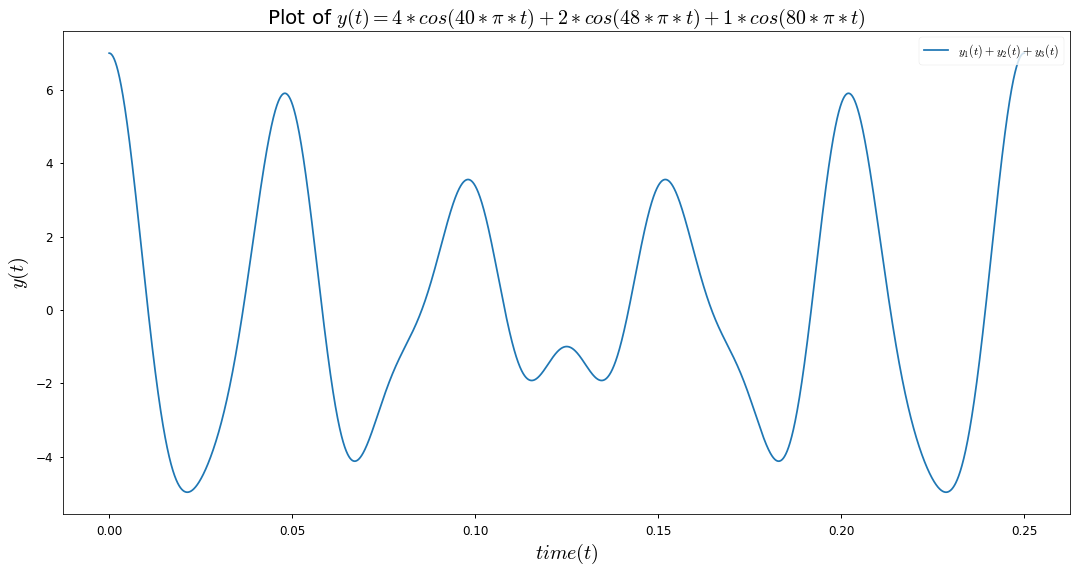

In [5]:
y = y1 + y2 + y3
fig, axs = plt.subplots()
axs.plot(t, y, label=r'$y_1(t)+y_2(t)+y_3(t)$')
axs.legend(loc = 'upper right', fontsize = 12)
axs.set_ylabel(r'$y(t)$', fontsize = 20)
axs.set_xlabel(r'$time(t)$', fontsize = 20)
axs.tick_params(axis="both", labelsize = 12)
axs.set_title('Plot of $y(t) = 4*cos(40*\pi*t) + 2*cos(48*\pi*t)+ 1*cos(80*\pi*t)$', fontsize = 20)
fig.tight_layout()

Part 3: <br>
a) Given sampling rate $F_s$ = 14$\alpha$ $\frac{samples}{sec}$= 56$\frac{samples}{sec}$ <br>
b) NyquistRate ($F_s$) = twice the max frequency = 2*10$\alpha$ = 80$\frac{samples}{sec}$ <br>
c) Since, the 6$\alpha$ frequecy is alliased to 3$\alpha$, we can say that the folding frequency ($\frac{F_s}{2}$) = $\frac{6\alpha + 3\alpha}{2}$ = 4.5$\alpha$ Hz <br>
this implies that the sampling frequency $F_s$ = $2*4.5\alpha$ = 9$\alpha$$\frac{samples}{sec}$ 


In [6]:
def cummulative_signal(t):
  return a*np.cos(2*pi*5*a*t) + (a/2)*np.cos(2*pi*6*a*t) + (a/4)*np.cos(2*pi*10*a*t)

sampling_freq_1 = 14*a
sampling_freq_2 = 20*a
sampling_freq_3 = 9*a
n1=np.arange(0, (1/a)+(1/sampling_freq_1), (1/sampling_freq_1))
n2=np.arange(0, (1/a)+(1/sampling_freq_2), (1/sampling_freq_2))
n3=np.arange(0, (1/a)+(1/sampling_freq_3), (1/sampling_freq_3))
stem_plot_title = ['Stem plot of cummulative signal when $F_s$ = 14' + r'$\alpha\ \frac{samples}{sec}$','Stem plot of cummulative signal when $F_s$ = 20' + r'$\alpha\ \frac{samples}{sec}$','Stem plot of cummulative signal when $F_s$ = 9' + r'$\alpha\ \frac{samples}{sec}$']

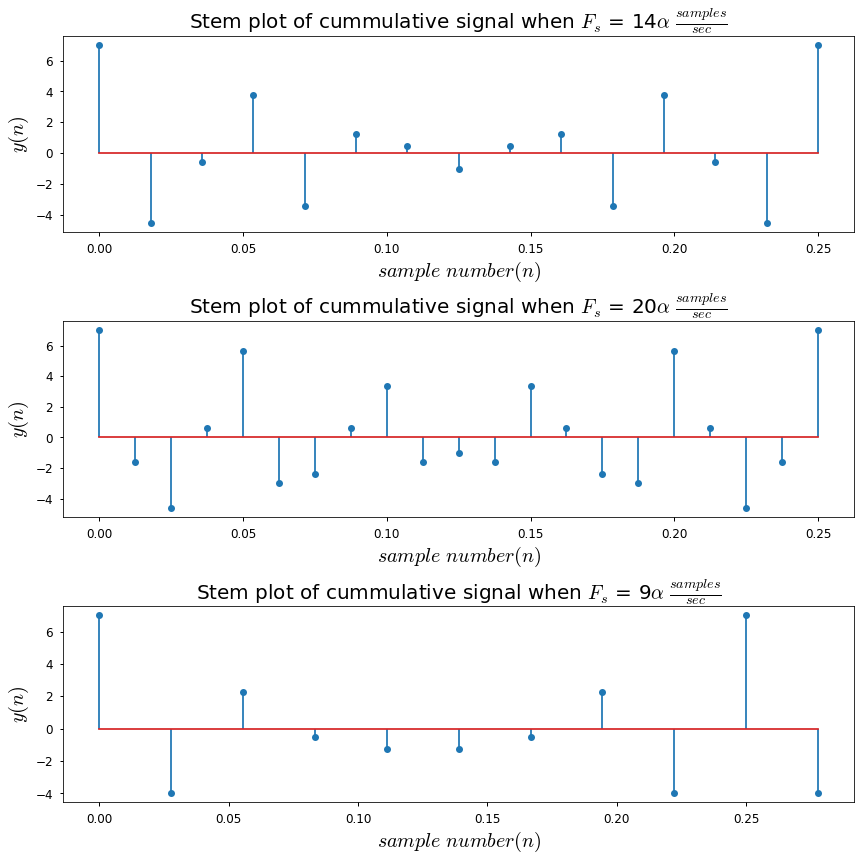

In [7]:
fig, axs = plt.subplots(3, figsize=(12,12))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].stem(x, y, use_line_collection = True)
    axs[row].set_title(stem_plot_title[row], fontsize = 20)
    axs[row].set_xlabel(xaxis_label, fontsize = 20)
    axs[row].set_ylabel(yaxis_label, fontsize = 20)
    axs[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(n1, cummulative_signal(n1), xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$y(n)$', row=0)
plot_signal(n2, cummulative_signal(n2), xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$y(n)$', row=1)
plot_signal(n3, cummulative_signal(n3), xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$y(n)$', row=2)

Part 4:


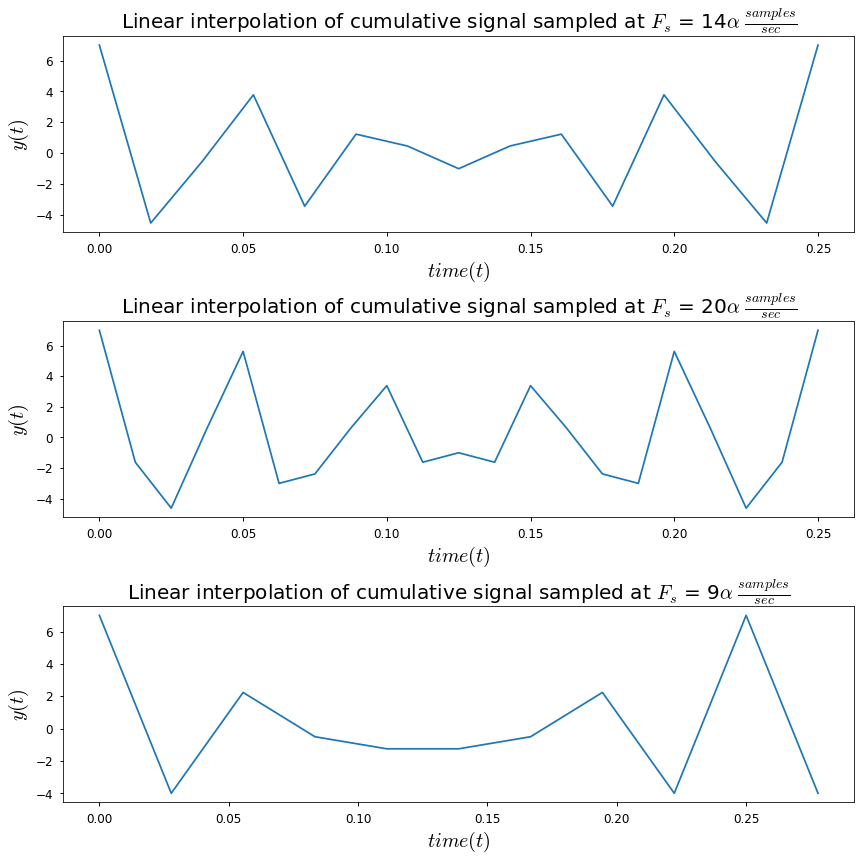

In [8]:
title = ['Linear interpolation of cumulative signal sampled at $F_s$ = 14' + r'$\alpha\ \frac{samples}{sec}$','Linear interpolation of cumulative signal sampled at $F_s$ = 20' + r'$\alpha\ \frac{samples}{sec}$','Linear interpolation of cumulative signal sampled at $F_s$ = 9' + r'$\alpha\ \frac{samples}{sec}$']
fig, axs = plt.subplots(3, figsize=(12,12))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y)
    axs[row].set_title(title[row], fontsize = 20)
    axs[row].set_xlabel(xaxis_label, fontsize = 20)
    axs[row].set_ylabel(yaxis_label, fontsize = 20)
    axs[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(n1, cummulative_signal(n1), xaxis_label=r'$time(t)$', yaxis_label=r'$y(t)$', row=0)
plot_signal(n2, cummulative_signal(n2), xaxis_label=r'$time(t)$', yaxis_label=r'$y(t)$', row=1)
plot_signal(n3, cummulative_signal(n3), xaxis_label=r'$time(t)$', yaxis_label=r'$y(t)$', row=2)

We know that the maximum frequency of the cumulative signal is 10$\alpha$. We also know that the Nyquist Rate is 20$\alpha$ meaning that if the sampling frequency $F_s$ is greater than the Nyquist Rate, then as per sampling theorem we can retrieve the signal completely. <br>


1.  Here, the cumulative signal is first sampled at a rate higher than the max. 
frequency of the signal but less than than the Nyquist rate <br>(10$\alpha$ < 14$\alpha$ < 20$\alpha$). Thus we notice a reasonable but not satisfactory linear interpolation since only some of the peaks & dips seen in the original signal have been omitted i.e., the signal is undersampled. Thus it is not advisable to interpret the behaviour of the original cumulative signal from this sampled signal.
2.   Now the cumulative signal is sampled at a rate equal to the Nyquist Rate, due to which we can notice a decent linear interpolation of the original signal i.e., it has captured all the peaks & dips seen in the original signal. Thus, we can ge a rough sense about the behaviour of the original cumulative signal.
3. Lastly, the cumulative signal is sampled at a rate less than the max. frequency of the signal & the Nyquist Rate (9$\alpha$ < 10$\alpha$ < 20$\alpha$). Here we notice that the resultant signal from the linear interpolation does not depict most of the peaks & dips seen in the original signal as it is severely undersampled. Thus it is not advisable to interpret the behaviour of the original cumulative signal from this sampled signal.

Part 5:

In [16]:
def cummulative_signal(t):
  return a*np.cos(2*pi*5*a*t) + (a/2)*np.cos(2*pi*6*a*t) + (a/4)*np.cos(2*pi*10*a*t)

sampling_rate_1 = 14*a
sampling_rate_2 = 20*a
sampling_rate_3 = 9*a
n1=np.arange(0, (1/a)+(1/sampling_rate_1), (1/sampling_rate_1))
n2=np.arange(0, (1/a)+(1/sampling_rate_2), (1/sampling_rate_2))
n3=np.arange(0, (1/a)+(1/sampling_rate_3), (1/sampling_rate_3))

fourier_transform_1 = np.fft.rfft(cummulative_signal(n1))
fourier_transform_2 = np.fft.rfft(cummulative_signal(n2))
fourier_transform_3 = np.fft.rfft(cummulative_signal(n3))

abs_fourier_transform_1 = np.abs(fourier_transform_1)
abs_fourier_transform_2 = np.abs(fourier_transform_2)
abs_fourier_transform_3 = np.abs(fourier_transform_3)

power_spectrum_1 = np.square(abs_fourier_transform_1)
power_spectrum_2 = np.square(abs_fourier_transform_2)
power_spectrum_3 = np.square(abs_fourier_transform_3)

frequency_1 = np.linspace(0, sampling_rate_1/2, len(power_spectrum_1))
frequency_2 = np.linspace(0, sampling_rate_2/2, len(power_spectrum_2))
frequency_3 = np.linspace(0, sampling_rate_3/2, len(power_spectrum_3))

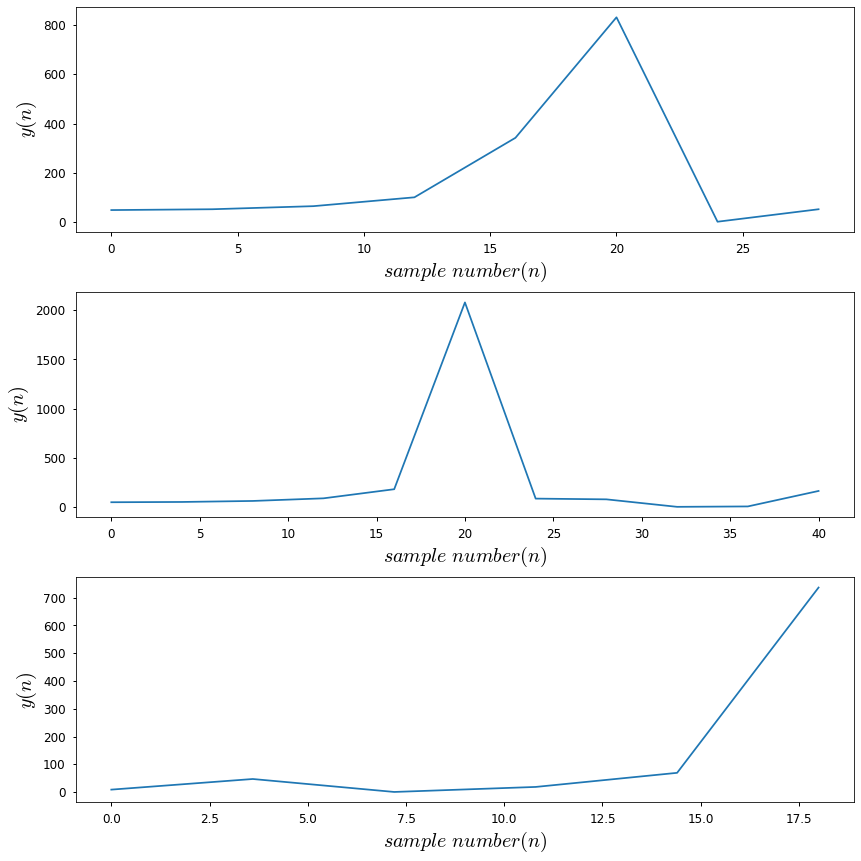

In [18]:
fig, axs = plt.subplots(3, figsize=(12,12))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y)
    #axs[row].set_title(stem_plot_title[row], fontsize = 20)
    axs[row].set_xlabel(xaxis_label, fontsize = 20)
    axs[row].set_ylabel(yaxis_label, fontsize = 20)
    axs[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(frequency_1, power_spectrum_1, xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$y(n)$', row=0)
plot_signal(frequency_2, power_spectrum_2, xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$y(n)$', row=1)
plot_signal(frequency_3, power_spectrum_3, xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$y(n)$', row=2)

# **Problem** **2**. <br>

In [14]:
frequencies = np.array([261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]) 
#array elements correspond to each note in "Do Re Mi Fa So La Ti Do" respectively
Fs = 16000
tone_sound = []

for itr in range(len(frequencies)):
    t = np.arange(0.5*(itr-1), 0.5*itr, 1/Fs)
    tone_sound = np.hstack([tone_sound, np.sin(frequencies[itr]*2*np.pi*t)])
    
display(Audio(data=tone_sound, rate=Fs))

wavfile.write('doremi.wav', Fs, tone_sound.astype(np.float32))